# 타이타닉 생존자 예측을 위한 EDA

## 라이브러리 호출 및 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [3]:
import seaborn as sns
df = sns.load_dataset("titanic")
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_percent

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [7]:
df["age"] = df["age"].fillna(df["age"].mean())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [8]:
survived_count = df["survived"].value_counts()
survived_rate = df["survived"].mean()
print(f"생존자: {survived_count[1]}명")
print(f"사망자: {survived_count[0]}명")
print(f"생존율: {survived_rate:.2%}")

생존자: 342명
사망자: 549명
생존율: 38.38%


## 1. 성별에 따른 생존율 분석

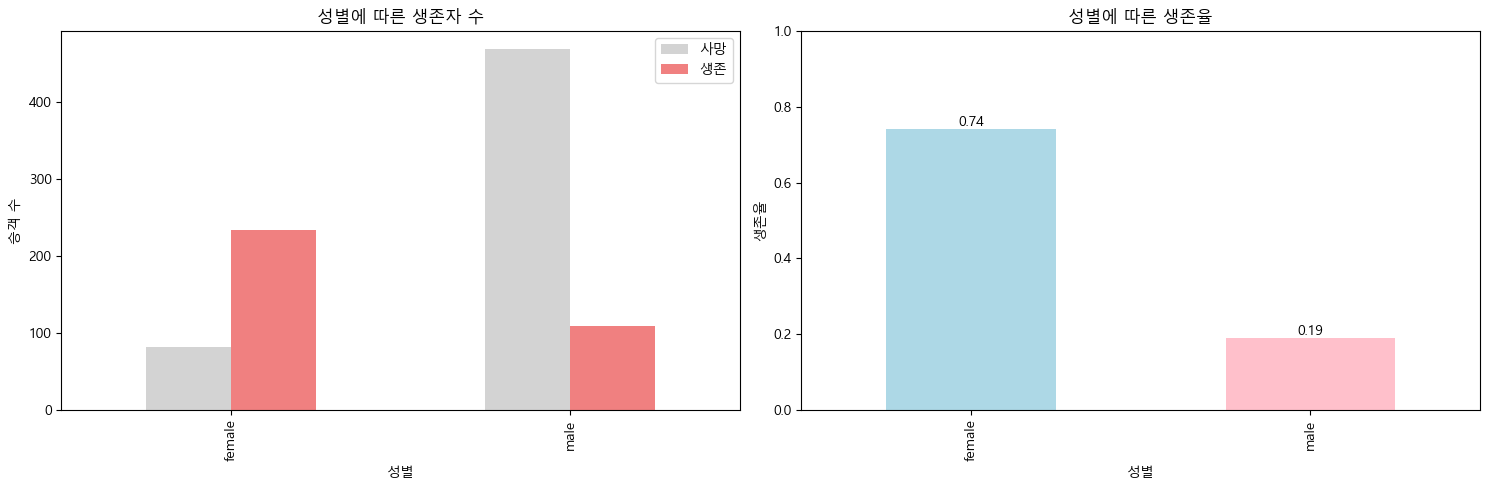

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 성별에 따른 생존자 수 (pandas plot)
df.groupby(['sex', 'survived']).size().unstack().plot(
    kind='bar',
    stacked=False,
    ax=axes[0],
    color=['lightgray', 'lightcoral']
)
axes[0].set_title("성별에 따른 생존자 수")
axes[0].set_xlabel("성별")
axes[0].set_ylabel("승객 수")
axes[0].legend(["사망", "생존"])

# 성별에 따른 생존율 (pandas plot)
sex_survived = df.groupby("sex")["survived"].mean()
sex_survived.plot(
    kind='bar',
    ax=axes[1],
    color=['lightblue', 'pink']
)
axes[1].set_title("성별에 따른 생존율")
axes[1].set_xlabel("성별")
axes[1].set_ylabel("생존율")
axes[1].set_ylim(0, 1)
axes[1].bar_label(axes[1].containers[0], fmt="%.2f")

plt.tight_layout()
plt.show()

## 2. 승객 등급에 따른 생존율
- 등급별 생존자 수
- 등급별 생존율
- 등급과 성별 교차표

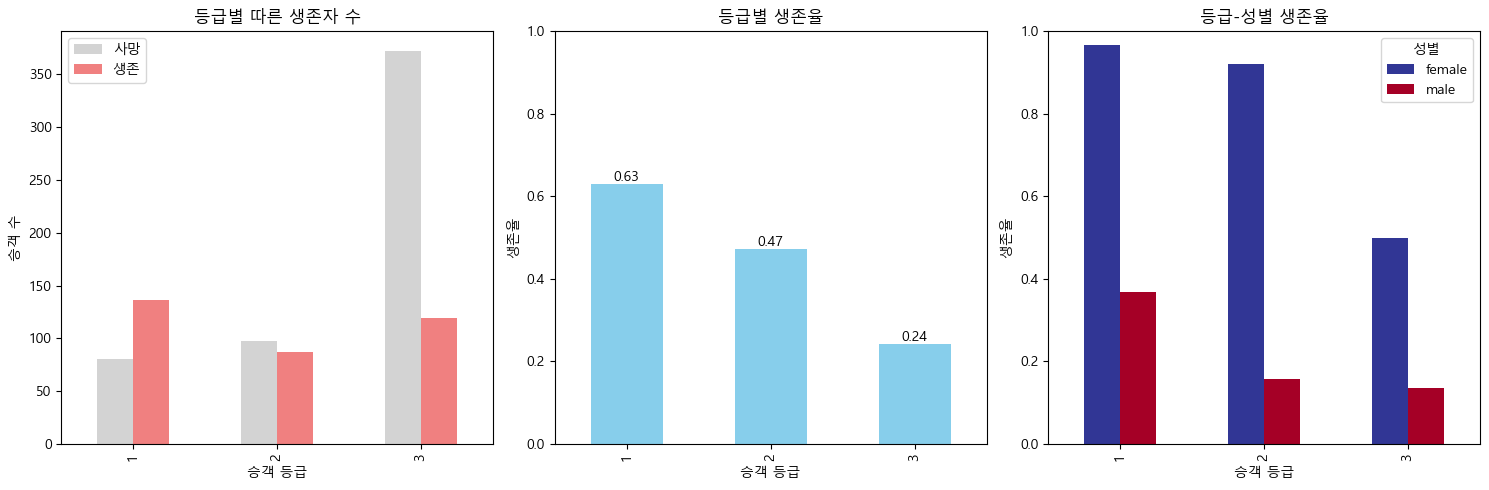

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 등급별 생존자 수 (pandas plot)
df.groupby(['pclass', 'survived']).size().unstack().plot(
    kind='bar',
    stacked=False,
    ax=axes[0],
    color=['lightgray', 'lightcoral']
)
axes[0].set_title("등급별 따른 생존자 수")
axes[0].set_xlabel("승객 등급")
axes[0].set_ylabel("승객 수")
axes[0].legend(["사망", "생존"])

# 등급별 생존율 (pandas plot)
pclass_survived = df.groupby("pclass")["survived"].mean()
pclass_survived.plot(
    kind='bar',
    ax=axes[1],
    color='skyblue'
)
axes[1].set_title("등급별 생존율")
axes[1].set_xlabel("승객 등급")
axes[1].set_ylabel("생존율")
axes[1].set_ylim(0, 1)
axes[1].bar_label(axes[1].containers[0], fmt="%.2f")

# 등급과 성별 교차표 (pandas plot)
cross_tab = pd.crosstab(df["pclass"], df["sex"], values=df["survived"], aggfunc="mean")
cross_tab.plot(
    kind='bar',
    ax=axes[2],
    colormap='RdYlBu_r'
)
axes[2].set_title("등급-성별 생존율")
axes[2].set_xlabel("승객 등급")
axes[2].set_ylabel("생존율")
axes[2].legend(title="성별")
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

## 3. 나이에 따른 생존율 분석
- 성별과 나이
- 전체 나이 분포
- 그룹별
- 생존 여부에 따른 나이 분포

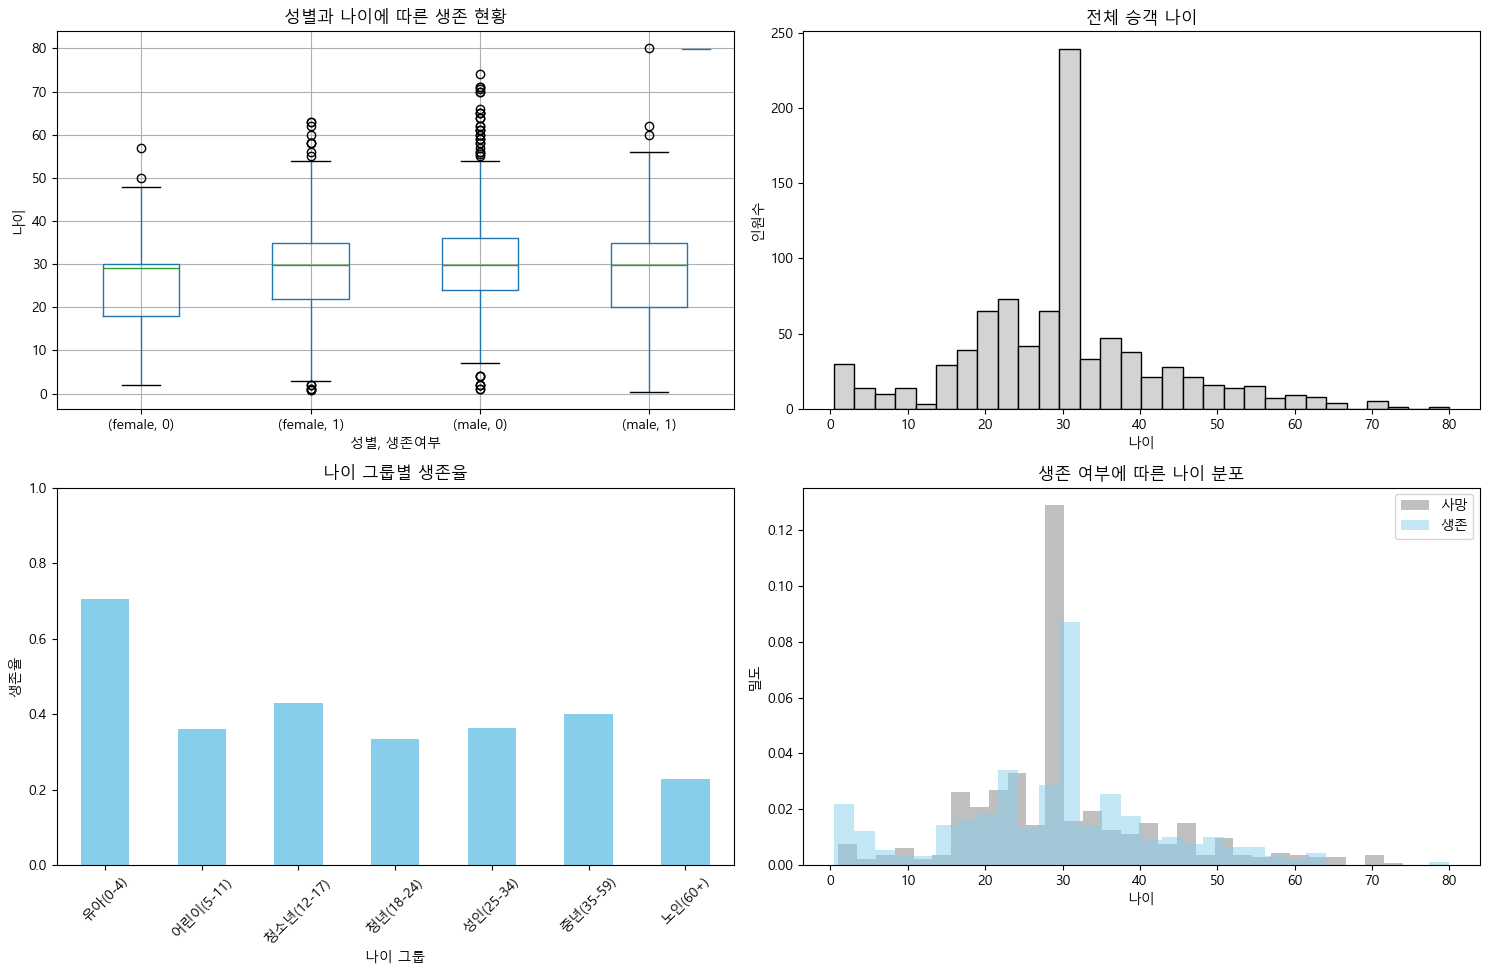

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 성별과 나이에 따른 생존 현황 (boxplot 대체: pandas boxplot)
df.boxplot(column="age", by=["sex", "survived"], ax=axes[0, 0])
axes[0, 0].set_title("성별과 나이에 따른 생존 현황")
axes[0, 0].set_xlabel("성별, 생존여부")
axes[0, 0].set_ylabel("나이")
axes[0, 0].legend([""], frameon=False)  # 범례 제거(자동생성 방지)
axes[0, 0].figure.suptitle("")  # by=로 인한 자동 타이틀 제거

# 2. 전체 승객 나이 (histplot 대체: pandas hist)
df["age"].plot.hist(ax=axes[0, 1], bins=30, color="lightgray", edgecolor="black")
axes[0, 1].set_title("전체 승객 나이")
axes[0, 1].set_xlabel("나이")
axes[0, 1].set_ylabel("인원수")

# 3. 나이 그룹별 생존율 (barplot 대체: pandas bar)
bins = [0, 5, 12, 18, 25, 35, 60, np.inf]
labels = [
    "유아(0-4)",
    "어린이(5-11)",
    "청소년(12-17)",
    "청년(18-24)",
    "성인(25-34)",
    "중년(35-59)",
    "노인(60+)",
]
df["age_group"] = pd.cut(df["age"], bins, labels=labels)

age_group_survived = df.groupby("age_group", observed=True)["survived"].mean()
age_group_survived.plot(kind="bar", ax=axes[1, 0], color="skyblue")
axes[1, 0].set_title("나이 그룹별 생존율")
axes[1, 0].set_xlabel("나이 그룹")
axes[1, 0].set_ylabel("생존율")
axes[1, 0].tick_params(axis="x", rotation=45)
axes[1, 0].set_ylim(0, 1)

# 4. 생존 여부에 따른 나이 분포 (histplot 대체: pandas hist, by 옵션)
df[df["survived"]==0]["age"].plot.hist(
    ax=axes[1, 1], bins=30, alpha=0.5, density=True, label="사망", color="gray"
)
df[df["survived"]==1]["age"].plot.hist(
    ax=axes[1, 1], bins=30, alpha=0.5, density=True, label="생존", color="skyblue"
)
axes[1, 1].set_title("생존 여부에 따른 나이 분포")
axes[1, 1].set_xlabel("나이")
axes[1, 1].set_ylabel("밀도")
axes[1, 1].legend()

plt.tight_layout()
plt.show()